# Analyse Rotation Spectra - Overview of Selection

## Load Libraries

In [20]:
from andbro__querrySeismoData import __querrySeismoData
from obspy import UTCDateTime
from scipy.signal import welch
from numpy import log10, zeros, pi, append, linspace, mean, median, array, where, transpose, shape, histogram, arange
from numpy import logspace, linspace, log, log10, isinf, ones, nan, count_nonzero, sqrt, isnan, append
from pandas import DataFrame, concat, Series, date_range, read_csv
from tqdm import tqdm_notebook
from pathlib import Path

import pickle
import matplotlib.pyplot as plt

In [8]:
!ls "/import/kilauea-data/ROMY/RotationSpectra/data/overview"

run_N3_RLAS-Z_3600.csv	run_N3_RLAS-Z_3600_DB.csv


## Configurations

In [112]:
inpath = f"/import/kilauea-data/ROMY/RotationSpectra/data/overview/"

config = {}

config['save'] = True

config['inpath'] = inpath

config['frequency_limits'] = [0.005, 30]

## Load and Process Data

In [80]:
df1 = read_csv(inpath+"run_N3_RLAS-Z_3600_DB.csv") 
df2 = read_csv(inpath+"run_N3_ROMY-Z_3600_DB.csv") 

In [81]:
psds_minimal = DataFrame()
psds_medians = DataFrame()
frequencies = DataFrame()

psds_minimal['RLAS 2019'] = df1.psds_minimal
psds_medians['RLAS 2019'] = df1.psds_median
frequencies['RLAS 2019'] = df1.frequencies

psds_minimal['ROMY-Z 2019'] = df2.psds_minimal
psds_medians['ROMY-Z 2019'] = df2.psds_median
frequencies['ROMY-Z 2019'] = df2.frequencies

## Plotting

In [114]:
def __makeplot_colorlines(config, ff, psds, data2=None, periods=True):
    '''
    psds -> DataFrame with all psds to plot
    ff   -> DataFrame with frequencies 
    ''' 

    ##____________________________
    
    fig, ax = plt.subplots(1,1, figsize=(15,10), sharey=False, sharex=True)

    font = 12

    for col in psds.keys():
#         ax.loglog(ff[col], psds[col], alpha=0.7, label=col)

        if periods:
            ax.semilogx(1/ff[col], psds[col], alpha=0.7, label=col)
        else:
            ax.semilogx(ff[col], psds[col], alpha=0.7, label=col)

    if data2 is not None:
        for col in data2.keys():
            if periods:
                ax.semilogx(1/ff[col], data2[col], color="grey", alpha=0.5, label="")        
            else:
                ax.semilogx(ff[col], data2[col], color="grey", alpha=0.5, label="")        
                
                
    ## add scatter for colorbar object only
#     for n, psd in enumerate(psds):
#         p2 = ax.scatter(ff[0], psd[0], s=0., c=n, cmap='rainbow', vmin=0, vmax=N)


#     ax.set_title("Minimal PSD", fontsize=font)
#     ax.set_title("Minimum PSD", fontsize=font)

    if periods:  
        ax.set_xlabel("Periods (s)", fontsize=font)
        ax.set_xlim(10**log10(1/config['frequency_limits'][1]), 10**log10(1/config['frequency_limits'][0]))

    else:
        ax.set_xlabel("Frequency (Hz)", fontsize=font)
        ax.set_xlim(10**log10(config['frequency_limits'][0]), 10**log10(config['frequency_limits'][1]))


    ax.set_ylabel(r"PSD (dB rel. to 1 rad$^2$/s$^2$/$Hz)$", fontsize=font)
    
    ax.grid(True, which="both", ls="-", alpha=0.5)
    
    ax.legend()
    
#     ax.set_xlim(10**log10(min(ff)), 10**log10(max(ff)))
    
    ## set colorbar at bottom
#     cbar = fig.colorbar(p2, orientation='horizontal', ax=ax, aspect=50)


    plt.show();

    return fig

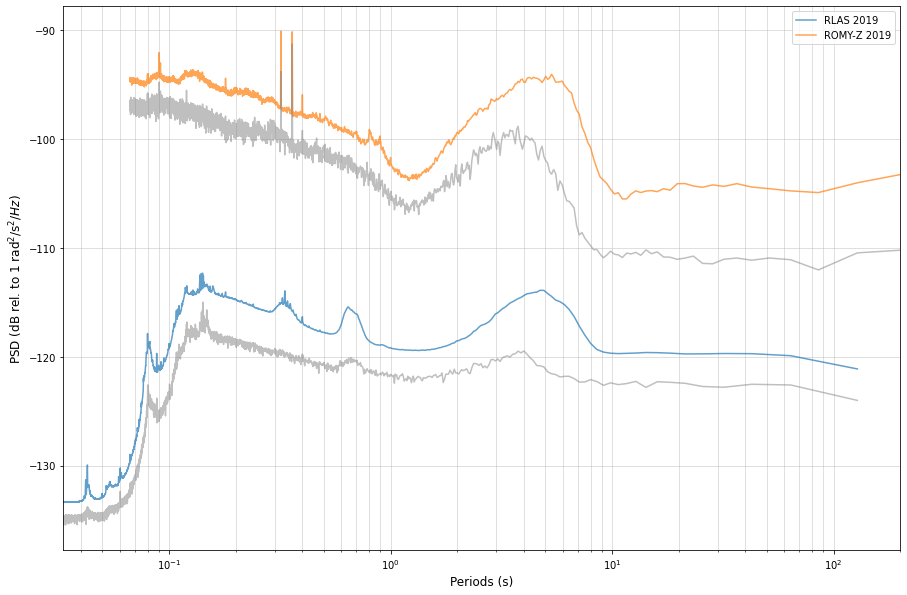

In [115]:
__makeplot_colorlines(config, frequencies, psds_medians, data2=psds_minimal, periods=True);

In [94]:
# __makeplot_colorlines(config, frequencies, psds_minimal);

### Write to File

In [ ]:
# if config['save']:
#     df1 = DataFrame(data=out)
#     df1.to_csv(f"{inpath}../overview/{inname}.csv", sep=",")